In [2]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

/Users/claus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Create Data

In [3]:
stores = np.array(['A', 'B', 'C', 'D', 'E', 'F'])

In [4]:
months = np.arange(1, 25)

In [5]:
size = len(stores) * len(months)
employees = 20
guest_average = 1000
lh100_average = 30 # per month
true_intercept = 100
true_slope = 1/lh100_average

x = stats.poisson.rvs(mu=guest_average, size=size)
# # y = a + b*x
true_regression_line = true_intercept + true_slope * x
# # add noise
true_sigma = .3
y = np.round(true_regression_line + np.random.normal(scale=true_sigma, size=size), 1)

data = dict(x=x, y=y)
data, true_slope

({'x': array([1014, 1002, 1034, 1036,  947,  967,  935, 1043, 1027,  962, 1034,
          938,  994, 1040, 1070,  988, 1022,  990, 1038,  974, 1042, 1013,
         1009, 1012, 1034,  970, 1004, 1023, 1013, 1013,  945,  996,  985,
          967, 1011,  968,  992, 1025,  977, 1085,  976,  962,  964,  974,
         1022,  964,  977, 1001,  996, 1018,  963,  992, 1000, 1045,  969,
         1017,  998, 1026,  971,  978, 1041,  996,  969, 1008, 1023,  904,
         1030, 1031,  965, 1000,  948, 1022,  970, 1031,  982, 1027, 1013,
          960, 1030, 1108,  965, 1017,  966,  993,  956,  983,  952, 1021,
          988,  989, 1030,  993, 1026, 1023, 1022,  977, 1033,  988, 1042,
          966, 1049, 1005,  936,  988, 1012,  974, 1025, 1046,  982, 1001,
          958, 1023,  981,  973, 1022, 1068, 1033, 1046,  970, 1005,  992,
         1071,  976,  992,  997,  998,  989,  965, 1051,  979,  968, 1027,
          970, 1005,  998, 1009,  947, 1002, 1017, 1040,  964, 1003, 1011,
          950]),
  '

In [6]:
df = pd.DataFrame([(m, s) for s in stores for m in months], columns=['month', 'store'])
df.loc[:,'labor_hrs'] = y
df.loc[:,'guest_cnt'] = x

In [7]:
df.head()

,month,store,labor_hrs,guest_cnt
0,1,A,134.4,1014
1,2,A,133.2,1002
2,3,A,134.4,1034
3,4,A,134.1,1036
4,5,A,131.3,947


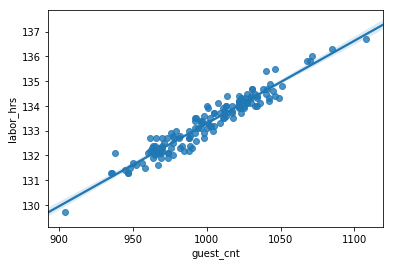

In [8]:
sns.regplot('guest_cnt', 'labor_hrs', df);

### Simple Linear Regression

In [9]:
import statsmodels.api as sm

/Users/claus/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
model = sm.OLS(df['labor_hrs'], sm.add_constant(df['guest_cnt']))
results = model.fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              labor_hrs   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1740.
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           1.44e-81
Time:                        09:20:06   Log-Likelihood:                -38.248
No. Observations:                 144   AIC:                             80.50
Df Residuals:                     142   BIC:                             86.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8913      0.801    124.725      0.000      98.308     101.474
guest_cnt      0.0334      0.001     41.711      0.000       0.032       0.035
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.128
Skew:                           0.201   Prob(JB):                        0.569
Kurtosis:                       2.837   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PyMC3 Version

In [12]:
import pymc3 as pm
import logging
(logging.getLogger('theano.gof.compilelock').setLevel(logging.CRITICAL))

In [13]:
df['guest_cnt'].values

array([1014, 1002, 1034, 1036,  947,  967,  935, 1043, 1027,  962, 1034,
        938,  994, 1040, 1070,  988, 1022,  990, 1038,  974, 1042, 1013,
       1009, 1012, 1034,  970, 1004, 1023, 1013, 1013,  945,  996,  985,
        967, 1011,  968,  992, 1025,  977, 1085,  976,  962,  964,  974,
       1022,  964,  977, 1001,  996, 1018,  963,  992, 1000, 1045,  969,
       1017,  998, 1026,  971,  978, 1041,  996,  969, 1008, 1023,  904,
       1030, 1031,  965, 1000,  948, 1022,  970, 1031,  982, 1027, 1013,
        960, 1030, 1108,  965, 1017,  966,  993,  956,  983,  952, 1021,
        988,  989, 1030,  993, 1026, 1023, 1022,  977, 1033,  988, 1042,
        966, 1049, 1005,  936,  988, 1012,  974, 1025, 1046,  982, 1001,
        958, 1023,  981,  973, 1022, 1068, 1033, 1046,  970, 1005,  992,
       1071,  976,  992,  997,  998,  989,  965, 1051,  979,  968, 1027,
        970, 1005,  998, 1009,  947, 1002, 1017, 1040,  964, 1003, 1011,
        950])

In [14]:
with pm.Model() as model:
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    alpha = pm.Normal('alpha', 1, sd=10)
    beta = pm.Normal('beta', 0, sd=20)

    # Define likelihood
    likelihood = pm.Normal('y', 
                           mu=alpha + beta * df['guest_cnt'].values,
                           sd=sigma, 
                           observed=df['labor_hrs'].values)

In [15]:
n_samples = 4000
n_chains = 3
seed = 22
SAMPLE_KWARGS = {
    'draws': n_samples,
    'tune': int(n_samples/2),
    'njobs': n_chains,
    'random_seed': [seed + i for i in range(n_chains)],
    'nuts_kwargs': {'target_accept': 0.9}
}
with model:
    trace = pm.sample(**SAMPLE_KWARGS)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/claus/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [beta, alpha, sigma_log__]
100%|██████████| 6000/6000 [01:40<00:00, 59.81it/s]


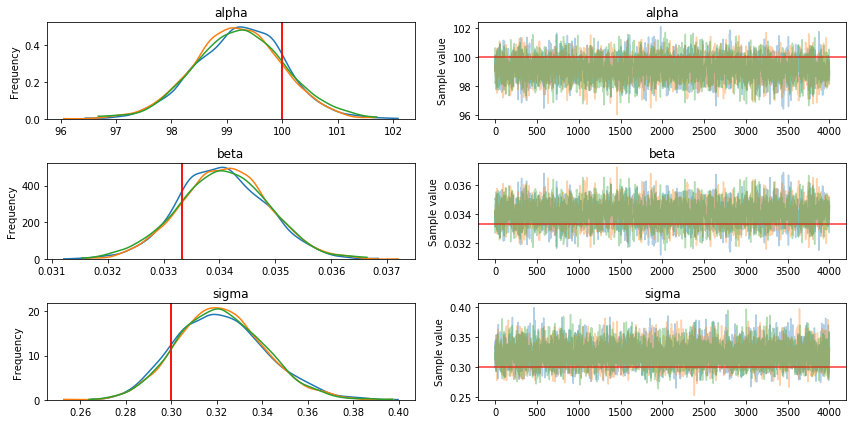

In [16]:
with model:
    pm.traceplot(trace, lines={'alpha': true_intercept, 'beta': true_slope, 'sigma': true_sigma})

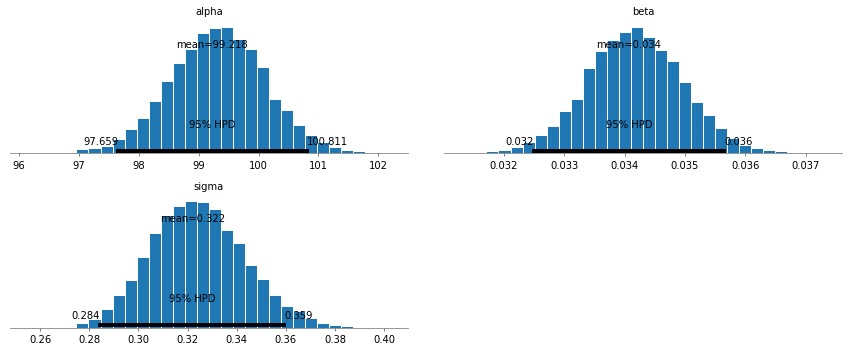

In [17]:
with model:
    pm.plot_posterior(trace)

### Partially Pooled Model (Store)

In [19]:
n_stores = len(stores)
df['store_id'] = pd.Categorical(df['store']).codes
store_idx = df['store_id']
# store_idx

In [20]:
df

,month,store,labor_hrs,guest_cnt,store_id
0,1,A,134.4,1014,0
1,2,A,133.2,1002,0
2,3,A,134.4,1034,0
3,4,A,134.1,1036,0
4,5,A,131.3,947,0
5,6,A,131.6,967,0
6,7,A,131.3,935,0
7,8,A,134.9,1043,0
8,9,A,134.1,1027,0
9,10,A,132.7,962,0


In [ ]:
df.groupby('store')['lh100'].mean().values

In [52]:
with pm.Model() as model_pp_store:
    # Define priors
    alpha = pm.Normal('alpha', 0, sd=10)
    beta = pm.Normal('beta', 0, sd=20)
    
    # Let's vary the intercepts:
    sigma_store = pm.HalfCauchy('sigma_store', 10)
    alpha_store = pm.Normal('alpha_store', alpha, sigma_store, shape=n_stores)
       
    # Define likelihood
    labor_hrs_store = pm.Normal('labor_hrs_store', 
                                mu=alpha_store[store_idx] + beta * df['guest_cnt'].values,
                                sd=sigma_store, 
                                observed=df['labor_hrs'].values
                               )

In [53]:
model_pp_store

In [54]:
n_samples = 4000
n_chains = 3
seed = 22
SAMPLE_KWARGS = {
    'draws': n_samples,
    'tune': int(n_samples/2),
    'njobs': n_chains,
    'random_seed': [seed + i for i in range(n_chains)],
    'nuts_kwargs': {'target_accept': 0.9}
}
with model_pp_store:
    trace_pp_store = pm.sample(**SAMPLE_KWARGS)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/claus/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [alpha_store, sigma_store_log__, beta, alpha]
100%|██████████| 6000/6000 [02:29<00:00, 40.02it/s]
The acceptance probability does not match the target. It is 0.8397704970619247, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


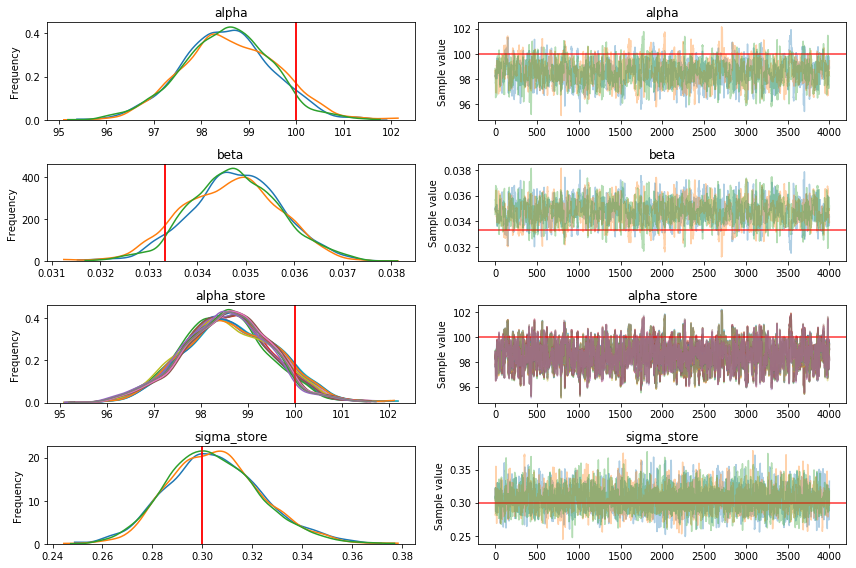

In [55]:
with model_pp_store:
    pm.traceplot(trace_pp_store, lines={'alpha': true_intercept, 'alpha_store': true_intercept, 'beta': true_slope, 'sigma_store': true_sigma})

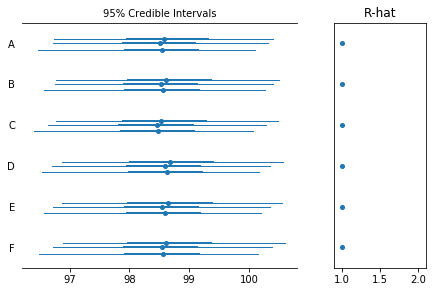

In [60]:
pm.forestplot(trace_pp_store, varnames=['alpha_store'], ylabels=stores);

### LH/100 Model

In [ ]:
size = len(stores) * len(months)
employees = 20
guest_average = 1000
lh100_average = 30 
true_intercept = 100
true_slope = 1/lh100_average

In [62]:
df['lh100'] = df['labor_hrs']/(df['guest_cnt']/100)

In [84]:
df['lh100'].values

array([13.37022133, 13.23442136, 13.37349398, 13.14341847, 13.52760736,
       13.33333333, 13.43117409, 13.01449275, 13.04937076, 13.4822335 ,
       13.66080662, 13.94680851, 13.24378109, 13.92364793, 13.22709163,
       13.57289528, 13.40361446, 13.74348279, 12.9050815 , 13.85340314,
       13.25098814, 13.30677291, 13.77615063, 13.67010309, 12.84900285,
       13.12805474, 13.08365759, 13.27037773, 13.44827586, 13.35341365,
       13.06718598, 13.49544073, 13.33666334, 13.52941176, 13.09803922,
       13.36345382, 13.65325077, 13.32329317, 12.93666027, 13.02415459,
       13.66182573, 13.16046967, 13.09803922, 13.26388889, 13.46855984,
       12.92659676, 13.22740814, 13.72528616, 13.34677419, 12.85986654,
       13.84210526, 12.75829384, 13.50662589, 13.03883495, 13.27363184,
       13.2312253 , 13.39393939, 13.72916667, 13.47914547, 13.66839378,
       12.83822138, 13.15429687, 13.37011033, 13.73056995, 13.57948718,
       12.87476281, 12.77830637, 13.18496538, 13.26086957, 12.81

In [110]:
with pm.Model() as lh_model:
    
    guests = pm.Normal('guests', mu=df['guest_cnt'].mean(), sd=df['guest_cnt'].std())
    
#     guests_sigma_store = pm.HalfCauchy('guests_sigma_store', 10)
#     guests_store = pm.Normal('guests_store', mu=guests, sd=guests_sigma_store, shape=n_stores)
        
    lh100 = pm.Normal('lh100', mu=df['lh100'].mean(), sd=df['lh100'].std())
    lh100_sigma_store = pm.HalfCauchy('lh100_sigma_store', 10)
    lh100_store = pm.Normal('lh100_store', mu=lh100, sd=lh100_sigma_store, shape=n_stores)
    
    sigma = pm.HalfCauchy('sigma', 10)
    labor_hours = pm.Normal('labor_hours', 
                            mu=(guests/100)*lh100_store[store_idx], 
                            sd=sigma, 
                            observed=df['labor_hrs'].values)

In [111]:
lh_model

In [112]:
n_samples = 4000
n_chains = 3
seed = 22
SAMPLE_KWARGS = {
    'draws': n_samples,
    'tune': int(n_samples/2),
    'njobs': n_chains,
    'random_seed': [seed + i for i in range(n_chains)],
    'nuts_kwargs': {'target_accept': 0.9}
}
with lh_model:
    trace_lh = pm.sample(**SAMPLE_KWARGS)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/claus/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sigma_log__, lh100_store, lh100_sigma_store_log__, lh100, guests]
100%|██████████| 6000/6000 [03:00<00:00, 33.26it/s]
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
There were 140 divergences after tuning. Increase `target_accept` or reparameterize.
There were 172 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


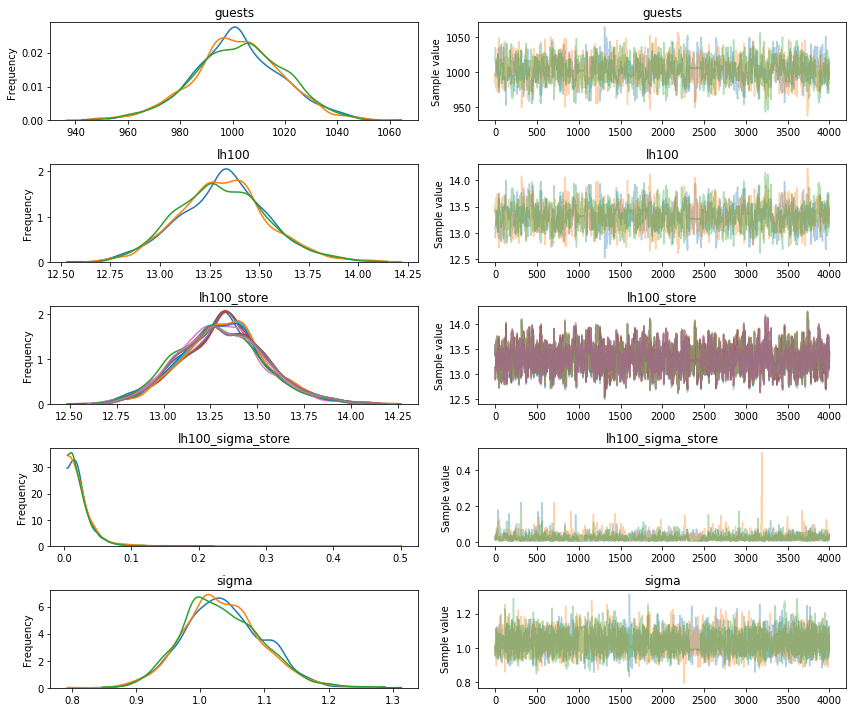

In [114]:
with lh_model:
    pm.traceplot(trace_lh)

In [115]:
pm.bfmi(trace_lh)

0.7032878037984546

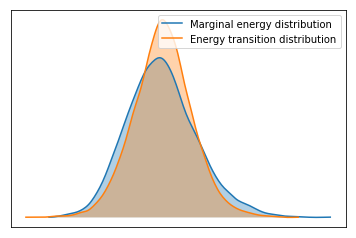

In [116]:
pm.energyplot(trace_lh);

In [117]:
max(np.max(gr_stats) for gr_stats in pm.gelman_rubin(trace_lh).values())

1.0063408447023254